# **Prediksi Pesanan Online Shop - DATA MINING CUP 2013**
# **Tugas EDA dan Model Klasifikasi**

Hari/Tanggal Pembuatan Awal : Jum'at, 08 November 2024

Hari/Tanggal Perbaikan : Selasa, 19 November 2024

Kelompok 8
1. Mohammad Raihan Aulia Kamil (2205449)
2. Amelia Zalfa Julianti (2203999)
3. Haris Maulana (2209058)
4. Siti Rija Dana Prima (2202014)
5. Syifa Azzahra (2207308)

##**Pendahuluan**
Kompetisi DATA MINING CUP (DMC) 2013 berfokus pada prediksi pesanan di toko online, sebuah langkah strategis untuk memahami perilaku pelanggan dan meningkatkan efektivitas pemasaran. Prediksi ini membantu toko online menawarkan promosi yang lebih relevan, seperti kupon untuk pelanggan dengan peluang pembelian rendah, serta meningkatkan peluang upselling produk. Dengan analisis data historis, toko dapat mengelola stok lebih efisien dan merancang kampanye yang lebih terarah. Keakuratan prediksi juga memungkinkan bisnis menyesuaikan strategi sesuai kebutuhan pelanggan, sehingga mengoptimalkan pengalaman belanja mereka. Kompetisi ini mengasah kemampuan peserta dalam menerapkan teknik data mining untuk memecahkan masalah nyata di industri. Selain menjadi ajang inovasi, DMC 2013 juga menunjukkan bagaimana data dapat diubah menjadi solusi yang mendorong pertumbuhan bisnis e-commerce secara efektif.

##**Deskripsi Data**
Pada kompetisi ini, data yang disediakan mencatat aktivitas sesi dari pengunjung toko online, yang mencakup kunjungan halaman produk dan tindakan lain selama sesi berlangsung. Dataset historis ini mencakup sekitar 50.000 sesi, dan setiap sesi diberi label untuk menunjukkan apakah terjadi pesanan ("y") atau tidak ("n").

## **Tujuan**
Tujuan utama dari proyek ini adalah membangun model prediktif yang dapat mengestimasi kemungkinan pesanan berdasarkan aktivitas yang tercatat dalam sesi pengguna. Setelah model dilatih menggunakan data historis, model ini akan digunakan untuk memprediksi hasil pada sekitar 5.000 sesi lainnya yang belum diketahui hasil akhirnya.

##**Langkah-Langkah Melakukan Prediksi**
A. Exploratory Data Analysis
1. Eksplorasi Dataset – Mengeksplorasi struktur data untuk memahami fitur dan pola yang relevan dengan prediksi pesanan.
2. Pra-pemrosesan Data – Melakukan pembersihan data, penanganan nilai kosong, dan transformasi fitur jika diperlukan.
       

B. Model Klasifikasi
1. Pelatihan Model – Membangun model prediktif menggunakan teknik machine learning yang sesuai.
2. Evaluasi dan Tuning Model – Mengukur performa model untuk meminimalkan kesalahan prediksi.
3. Prediksi Akhir dan Penyimpanan Hasil – Menghasilkan prediksi probabilitas pesanan untuk sesi pengujian dan menyimpan hasil dalam format yang ditentukan untuk pengumpulan.



|

|

|

## **1. Exploratory Data Analysis (EDA)**

### A. Eksplorasi Data

#### Import libraries yang diperlukan

In [ ]:
# Import libraries
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#### Mengunggah file dataset

In [ ]:
from google.colab import files
from gdown import download

id = "1j0Pf1FZlhXEmnVb6zS17DTRqbhwQB-J6"
output = "transact_train.txt"
gdown.download(id=id, output=output)

Downloading...
From: https://drive.google.com/uc?id=1j0Pf1FZlhXEmnVb6zS17DTRqbhwQB-J6
To: /content/transact_train.txt
100%|██████████| 44.7M/44.7M [00:00<00:00, 67.9MB/s]


'transact_train.txt'

#### Membaca file dataset

In [39]:
# Membaca dataset
order = pd.read_csv('transact_train.txt', delimiter='|')

#### Melihat informasi dataset

In [ ]:
# Melihat informasi dataset
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        429013 non-null  object 
 6   cMaxPrice        429013 non-null  object 
 7   cSumPrice        429013 non-null  object 
 8   bCount           429013 non-null  int64  
 9   bMinPrice        429013 non-null  object 
 10  bMaxPrice        429013 non-null  object 
 11  bSumPrice        429013 non-null  object 
 12  bStep            429013 non-null  object 
 13  onlineStatus     429013 non-null  object 
 14  availability     429013 non-null  object 
 15  customerNo       429013 non-null  object 
 16  maxVal           429013 non-null  obje

Dari informasi dataset diatas terdapat total 23 atribut dan 429.013 record

Berikut penjelasan tiap dataset dari dataset diatas (diambil dari deskripsi soal).

| Nama Kolom        | Deskripsi                                           | Rentang Nilai                                | Nilai Hilang  |
|--------------------|----------------------------------------------------|----------------------------------------------|---------------|
| sessionNo          | Nomor sesi yang berjalan                           | Bilangan alami                               | Tidak         |
| startHour          | Jam saat sesi dimulai                              | Bilangan alami antara 0 dan 23               | Tidak         |
| startWeekday       | Hari dalam seminggu saat sesi dimulai (1-Mo, 2-Tu, dst.) | Bilangan alami {1, 2, 3, 4, 5, 6, 7}       | Tidak         |
| duration           | Waktu dalam detik sejak sesi dimulai               | Bilangan riil non-negatif                    | Tidak         |
| cCount             | Jumlah produk yang diklik                          | Bilangan alami                               | Tidak         |
| cMinPrice          | Harga terendah dari produk yang diklik             | Bilangan riil non-negatif                    | Ya            |
| cMaxPrice          | Harga tertinggi dari produk yang diklik            | Bilangan riil non-negatif                    | Ya            |
| cSumPrice          | Total harga dari semua produk yang diklik          | Bilangan riil non-negatif                    | Ya            |
| bCount             | Jumlah produk yang dimasukkan ke keranjang belanja | Bilangan alami                               | Tidak         |
| bMinPrice          | Harga terendah dari produk dalam keranjang belanja | Bilangan riil non-negatif                    | Ya            |
| bMaxPrice          | Harga tertinggi dari produk dalam keranjang belanja| Bilangan riil non-negatif                    | Ya            |
| bSumPrice          | Total harga dari semua produk dalam keranjang      | Bilangan riil non-negatif                    | Ya            |
| bStep              | Langkah pemrosesan pembelian                       | Bilangan alami {1, 2, 3, 4, 5}               | Ya            |
| onlineStatus       | Status apakah pelanggan sedang online (y-ya, n-tidak) | String                                    | Ya            |
| availability       | Status ketersediaan pengiriman                     | String                                       | Ya            |
| customerID         | Nomor pelanggan                                    | String                                       | Ya            |
| maxVal             | Harga pembelian maksimum yang diizinkan untuk pelanggan | Bilangan alami                          | Ya            |
| customerScore      | Evaluasi pelanggan dari sudut pandang toko         | Bilangan alami                               | Ya            |
| accountLifetime    | Umur akun pelanggan dalam bulan                    | Bilangan alami                               | Ya            |
| payments           | Jumlah pembayaran yang dilakukan oleh pelanggan    | Bilangan alami                               | Ya            |
| age                | Usia pelanggan                                     | Bilangan alami                               | Ya            |
| address            | Bentuk sapaan pelanggan (1-Tuan, 2-Nyonya, 3-Perusahaan)    | Bilangan alami {1, 2, 3}    | Ya          |
| lastOrder    | Waktu dalam hari sejak pesanan terakhir    | Bilangan alami    | Ya          |
| order    | Hasil sesi (y-pembelian, n-tidak pembelian)    | Karakter    | Tidak          |


Bisa dilihat, terdapat campuran jenis data, termasuk bilangan alami, bilangan riil non-negatif, string, dan karakter. Dapat dilihat juga sebagian besar kolom memiliki nilai yang hilang.

#### Menampilkan 5 baris record pertama dan terakhir pada dataset

In [ ]:
# Atur jumlah maksimum kolom yang ditampilkan
pd.set_option('display.max_columns', 24)

In [ ]:
# Menampilkan 5 baris pertama
order.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,59.99,59.99,?,?,?,1,600,70,21,1,43,1,49,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,59.99,59.99,2,y,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,59.99,59.99,?,y,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.000,0,?,?,?,0,?,?,?,2,y,completely orderable,?,?,?,?,?,?,?,?,y
4,2,6,5,15.633,0,?,?,?,0,?,?,?,?,y,completely orderable,?,?,?,?,?,?,?,?,y


In [ ]:
# Menampilkan 5 baris terakhir
order.tail()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
429008,49998,18,7,5988.882,77,9.99,149.99,5253.28,3,49.95,99.99,209.93,?,?,?,?,?,?,?,?,?,?,?,n
429009,49999,18,7,675.114,6,59.0,199.99,509.96,1,89.99,89.99,89.99,?,?,?,25038,?,?,?,0,24,1,4,n
429010,49999,18,7,715.341,7,59.0,649.99,1159.95,1,89.99,89.99,89.99,1,y,completely orderable,25038,?,?,?,0,24,1,4,n
429011,50000,18,7,0.000,1,6.99,6.99,6.99,1,6.99,6.99,6.99,?,?,?,47,300,537,5,0,53,1,34,n
429012,50000,18,7,82.943,1,6.99,6.99,6.99,1,6.99,6.99,6.99,?,y,completely orderable,47,300,537,5,0,53,1,34,n


Ditampilkan 5 baris teratas dan terbawah dari dataset. Dapat dilihat terdapat banyak nilai `'?'` yang tidak mewakili suatu nilai dalam dataset yang akan dibuatkan model prediksi.

#### Memeriksa dan menghitung nilai NULL dalam dataset

In [ ]:
order.isnull().sum()

,0
sessionNo,0
startHour,0
startWeekday,0
duration,0
cCount,0
cMinPrice,0
cMaxPrice,0
cSumPrice,0
bCount,0
bMinPrice,0


Setelah dilakukan pemeriksaan nilai NULL, dapat disimpulkan bahwa nilai NULL di dalam dataset tersebut diwakili oleh nilai `'?'`.

#### Memeriksa kategori-kategori pada beberapa atribut kategori

In [ ]:
# Memeriksa kategori pada atribut 'onlineStatus'
order.onlineStatus.value_counts()

,count
onlineStatus,
y,265625
?,160379
n,3009


In [ ]:
# Memeriksa kategori pada atribut 'onlineStatus'
order.bStep.value_counts()

,count
bStep,
1,90058
2,60682
4,41142
3,30062
5,15736


In [ ]:
# Memeriksa kategori pada atribut 'availability'
order.availability.value_counts()

,count
availability,
completely orderable,253692
?,165255
mainly orderable,5756
completely not orderable,1491
mixed,1284
completely not determinable,1017
mainly not orderable,320
mainly not determinable,198


In [ ]:
# Memeriksa kategori pada atribut 'order'
order.order.value_counts()

,count
order,
y,290030
n,138983


Berdasarkan hasil pemeriksaan kategori-kategori di beberapa tabel, bisa disimpulkan tidak ada inkonsistensi data kategorikal.     
Namun value `?` di dalam beberapa atribut sangat banyak hampir bisa mencapai setengah dari total record, tentu saja hal ini perlu ditangani.

#### Mengidentifikasi Outlier

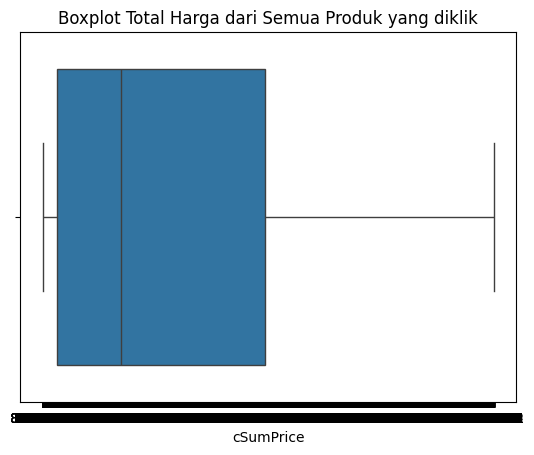

In [ ]:
sns.boxplot(x=order['cSumPrice'])
plt.title('Boxplot Total Harga dari Semua Produk yang diklik')
plt.show()

Boxplot pada gambar ini membantu mendeteksi adanya outlier dalam data distribusi total harga produk yang diklik. Boxplot menunjukkan distribusi harga total produk yang diklik. Dengan whisker yang sepenuhnya mencakup semua data, tidak ada nilai ekstrem (outlier) yang terdeteksi di dataset ini.

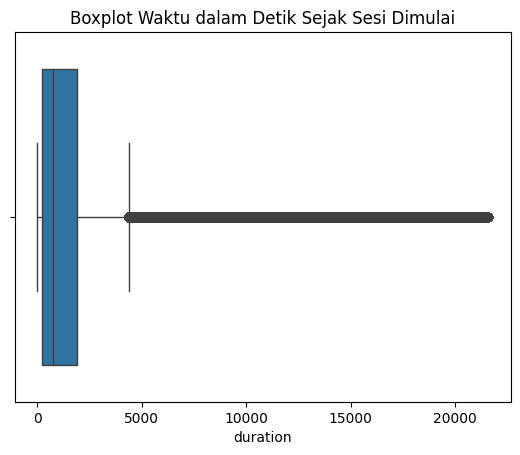

In [ ]:
sns.boxplot(x=order['duration'])
plt.title('Boxplot Waktu dalam Detik Sejak Sesi Dimulai')
plt.show()

Boxplot pada gambar ini membantu mendeteksi adanya outlier dalam data distribusi durasi waktu sesi dimulai. Boxplot menunjukkan distribusi durasi waktu sesi dalam detik. Dengan whisker yang mencakup sebagian besar data, titik-titik yang terletak di luar whisker bagian kanan menunjukkan durasi sesi yang sangat lama, yang dapat dianggap sebagai outlier. Durasi yang sangat panjang ini bisa jadi merupakan kejadian yang jarang terjadi atau perlu diperiksa lebih lanjut untuk memastikan apakah itu data yang valid atau sebuah kesalahan.

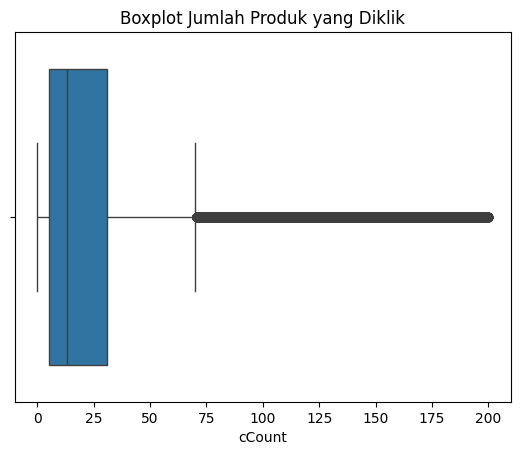

In [ ]:
sns.boxplot(x=order['cCount'])
plt.title('Boxplot Jumlah Produk yang Diklik')
plt.show()

Boxplot Jumlah Produk yang Diklik menunjukkan bahwa sebagian besar sesi memiliki jumlah klik yang rendah, dengan median berada di kisaran bawah. Mayoritas klik berkisar antara 0 hingga 25, sementara terdapat beberapa outlier signifikan hingga mendekati 200 klik. Hal ini mengindikasikan bahwa sebagian besar pengguna hanya menjelajahi sedikit produk, sedangkan sejumlah kecil pengguna menunjukkan aktivitas klik yang sangat tinggi. Rentang antarkuartil (IQR) yang sempit mencerminkan konsentrasi data pada kisaran klik rendah.

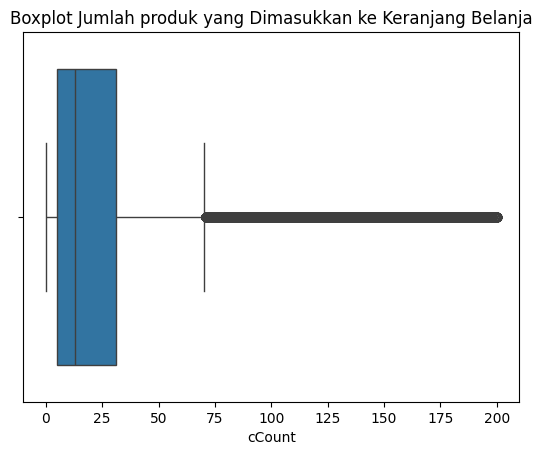

In [ ]:
sns.boxplot(x=order['cCount'])
plt.title('Boxplot Jumlah produk yang Dimasukkan ke Keranjang Belanja')
plt.show()

Boxplot menunjukkan distribusi jumlah produk (cCount) di keranjang belanja. Mayoritas transaksi di bawah 25 produk, dengan median di tengah kotak. Titik di luar garis (whiskers) adalah outlier yang mewakili transaksi dengan jumlah produk sangat tinggi (>100).

|

|

|

### B. Pra-pemrosesan Data

#### Menghapus beberapa kolom atribut

Kolom `customerNo` biasanya hanya digunakan sebagai pengenal unik pelanggan, sehingga tidak memberikan informasi penting untuk analisis. Kolom `startHour` dianggap kurang relevan atau tidak memiliki pengaruh besar terhadap hasil analisis.

In [40]:
order = order.drop(columns=['customerNo', 'startHour'])

#### Menangani nilai '?' dengan menggantinya dengan nilai NULL

Proses mengganti nilai `'?'` dengan NULL (NaN) dan menghapus baris yang mengandung NaN bertujuan untuk membersihkan data dari nilai yang tidak valid atau hilang. Nilai `'?'` sering kali mewakili data yang tidak diketahui, dan dengan mengubahnya menjadi NaN, data yang hilang dapat ditangani secara konsisten.

In [41]:
# Mengganti '?' dengan NaN
order = order.replace('?', np.nan)

Kode ini mengganti semua nilai `'?'` di data order2 dengan NaN (Not a Number), yaitu penanda untuk nilai yang hilang atau kosong. Biasanya, simbol `'?'` dipakai untuk menunjukkan data yang tidak ada, sehingga perlu diganti dengan NaN agar lebih mudah diproses dalam tahap selanjutnya.

Setelah nilai `'?'` diubah menjadi NaN, kode ini menghapus semua baris yang memiliki setidaknya satu NaN. Mengapa ini dilakukan? Karena data yang tidak lengkap dapat menyebabkan masalah atau ketidakakuratan dalam analisis. Dengan menghapus baris yang memiliki data kosong, maka data yang tersisa akan lebih bersih dan siap untuk dianalisis.

Memeriksa nilai NULL setelah di melakukan penggantian

In [42]:
order.isnull().sum()

,0
sessionNo,0
startWeekday,0
duration,0
cCount,0
cMinPrice,2765
cMaxPrice,2765
cSumPrice,2765
bCount,0
bMinPrice,5130
bMaxPrice,5130


Dapat dilihat, sekarang nilai NULL dalam beberapa atribut sudah bisa terdeteksi.

#### Menangani nilai NULL dengan menggunakan Hot Deck Imputation

Hot deck imputation adalah metode yang digunakan untuk mengatasi masalah missing values dalam dataset.       
Metode ini bekerja dengan cara mengisi nilai yang hilang pada suatu record dengan nilai dari record lain yang memiliki karakteristik serupa.

In [43]:
# Hot Deck Imputation (Random)
# Pilih hanya nilai yang tidak kosong
non_missing_values_cMinPrice = order['cMinPrice'].dropna()
non_missing_values_cMaxPrice = order['cMaxPrice'].dropna()
non_missing_values_cSumPrice = order['cSumPrice'].dropna()
non_missing_values_bMinPrice = order['bMinPrice'].dropna()
non_missing_values_bMaxPrice = order['bMaxPrice'].dropna()
non_missing_values_bSumPrice = order['bSumPrice'].dropna()
non_missing_values_bStep = order['bStep'].dropna()
non_missing_values_onlineStatus = order['onlineStatus'].dropna()
non_missing_values_availability = order['availability'].dropna()
non_missing_values_maxVal = order['maxVal'].dropna()
non_missing_values_customerScore = order['customerScore'].dropna()
non_missing_values_accountLifetime = order['accountLifetime'].dropna()
non_missing_values_payments = order['payments'].dropna()
non_missing_values_age = order['age'].dropna()
non_missing_values_address = order['address'].dropna()
non_missing_values_lastOrder = order['lastOrder'].dropna()
non_missing_values_order = order['order'].dropna()

# Imputasi nilai kosong dengan sampel acak dari nilai yang tersedia
order['cMinPrice'] = order['cMinPrice'].apply(lambda x: np.random.choice(non_missing_values_cMinPrice) if pd.isnull(x) else x)
order['cMaxPrice'] = order['cMaxPrice'].apply(lambda x: np.random.choice(non_missing_values_cMaxPrice) if pd.isnull(x) else x)
order['cSumPrice'] = order['cSumPrice'].apply(lambda x: np.random.choice(non_missing_values_cSumPrice) if pd.isnull(x) else x)
order['bMinPrice'] = order['bMinPrice'].apply(lambda x: np.random.choice(non_missing_values_cMinPrice) if pd.isnull(x) else x)
order['bMaxPrice'] = order['bMaxPrice'].apply(lambda x: np.random.choice(non_missing_values_cMaxPrice) if pd.isnull(x) else x)
order['bSumPrice'] = order['bSumPrice'].apply(lambda x: np.random.choice(non_missing_values_cSumPrice) if pd.isnull(x) else x)
order['bStep'] = order['bStep'].apply(lambda x: np.random.choice(non_missing_values_bStep) if pd.isnull(x) else x)
order['onlineStatus'] = order['onlineStatus'].apply(lambda x: np.random.choice(non_missing_values_onlineStatus) if pd.isnull(x) else x)
order['availability'] = order['availability'].apply(lambda x: np.random.choice(non_missing_values_availability) if pd.isnull(x) else x)
order['maxVal'] = order['maxVal'].apply(lambda x: np.random.choice(non_missing_values_maxVal) if pd.isnull(x) else x)
order['customerScore'] = order['customerScore'].apply(lambda x: np.random.choice(non_missing_values_customerScore) if pd.isnull(x) else x)
order['accountLifetime'] = order['accountLifetime'].apply(lambda x: np.random.choice(non_missing_values_accountLifetime) if pd.isnull(x) else x)
order['payments'] = order['payments'].apply(lambda x: np.random.choice(non_missing_values_payments) if pd.isnull(x) else x)
order['age'] = order['age'].apply(lambda x: np.random.choice(non_missing_values_age) if pd.isnull(x) else x)
order['address'] = order['address'].apply(lambda x: np.random.choice(non_missing_values_address) if pd.isnull(x) else x)
order['lastOrder'] = order['lastOrder'].apply(lambda x: np.random.choice(non_missing_values_lastOrder) if pd.isnull(x) else x)
order['order'] = order['order'].apply(lambda x: np.random.choice(non_missing_values_order) if pd.isnull(x) else x)

Memeriksa jumlah nilai NULL setelah dilakukan *Hot Deck Imputation*.

In [44]:
order.isnull().sum()

,0
sessionNo,0
startWeekday,0
duration,0
cCount,0
cMinPrice,0
cMaxPrice,0
cSumPrice,0
bCount,0
bMinPrice,0
bMaxPrice,0


Dapat dilihat, nilai NULL sudah tidak ada.

Perbandingan Distribusi Sebelum dan Sesudah Imputasi

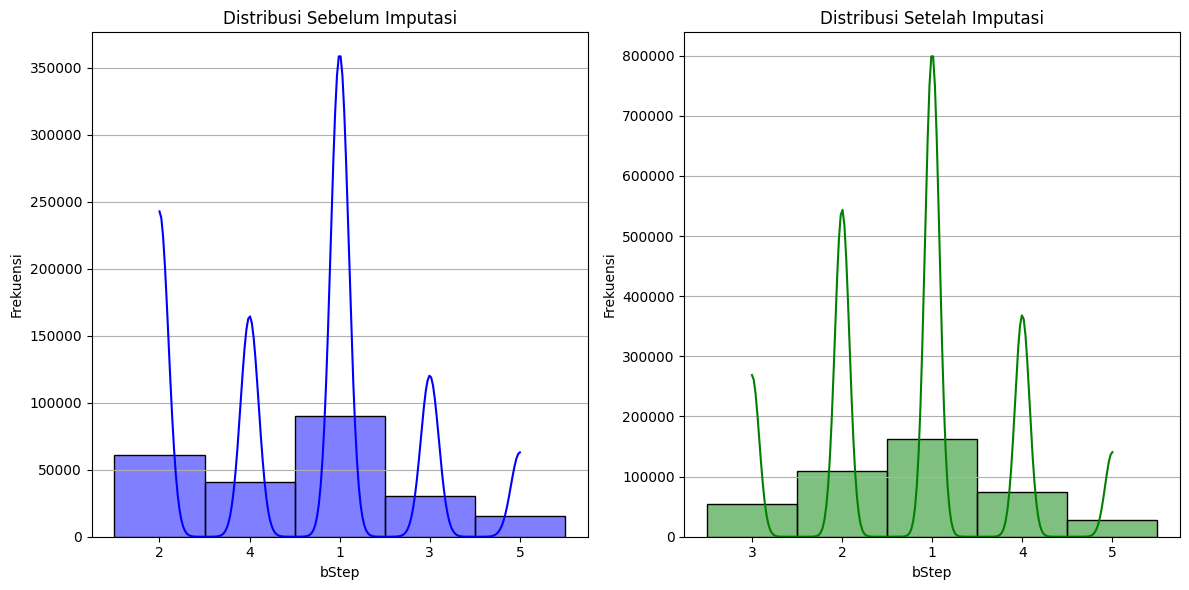

In [49]:
order_before = pd.read_csv('transact_train.txt', delimiter='|')
order_before = order_before.replace('?', np.nan)

# Visualisasi distribusi sebelum dan sesudah imputasi
plt.figure(figsize=(12, 6))

# Sebelum imputasi
plt.subplot(1, 2, 1)
sns.histplot(order_before['bStep'], bins=5, kde=True, color='blue', edgecolor='black')
plt.title('Distribusi Sebelum Imputasi')
plt.xlabel('bStep')
plt.ylabel('Frekuensi')
plt.grid(axis='y')

# Setelah imputasi
plt.subplot(1, 2, 2)
sns.histplot(order['bStep'], bins=5, kde=True, color='green', edgecolor='black')
plt.title('Distribusi Setelah Imputasi')
plt.xlabel('bStep')
plt.ylabel('Frekuensi')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Plot ini membandingkan distribusi data sebelum dan sesudah imputasi untuk variabel bStep. Berikut penjelasannya:

1. Distribusi Sebelum Imputasi (kiri):
   - Histogram menunjukkan jumlah frekuensi data yang ada untuk setiap kategori di bStep.
   - Terlihat ada pola distribusi dengan beberapa puncak, menunjukkan adanya gap atau data kosong/missing pada kategori tertentu. Hal ini membuat distribusi tidak sepenuhnya merata.
   - Kurva biru memperlihatkan density estimation (estimasi kepadatan data), yang juga mencerminkan bentuk distribusi.

2. Distribusi Setelah Imputasi (kanan):
   - Setelah dilakukan imputasi (mengisi nilai yang hilang), distribusi menjadi lebih teratur.
   - Frekuensi pada histogram meningkat di beberapa kategori, menunjukkan data yang sebelumnya kosong telah diisi.
   - Kurva hijau (density) menjadi lebih halus, mencerminkan distribusi data yang lebih stabil dan konsisten.

- Imputasi berhasil memperbaiki distribusi data, mengurangi gap atau ketimpangan antara kategori.
- Namun, kita perlu mengevaluasi metode imputasi yang digunakan untuk memastikan bahwa pola distribusi tidak menjadi bias atau terlalu terdistorsi dari data aslinya.

#### Mengonversi atribut-atribut yang seharusnya nilai numerik

Mengonversi atribut yang seharusnya bernilai numerik memastikan kolom numerik memiliki tipe data yang sesuai, yaitu angka, bukan teks. Hal ini penting agar perhitungan, seperti mencari rata-rata atau total, dapat dilakukan dengan benar. Jika data masih dalam bentuk teks, perhitungan bisa menghasilkan kesalahan. Dengan melakukan konversi, kita memastikan bahwa seluruh proses analisis berjalan dengan akurat dan efektif.

In [50]:
# Mengonversi kolom yang seharusnya numerik
numerical_cols = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice',
                  'bSumPrice', 'bStep', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']

for col in numerical_cols:
    order[col] = pd.to_numeric(order[col], errors='coerce')  # errors='coerce' mengubah nilai error menjadi NaN

Bagian pertama kode ini membuat daftar nama-nama kolom yang seharusnya bernilai angka, seperti harga, skor pelanggan, atau umur. Namun, kolom-kolom ini mungkin masih berbentuk teks (string), sehingga perlu dikonversi ke bentuk angka supaya bisa digunakan dalam perhitungan.

Pada langkah selanjutnya, kode melakukan perulangan (for) untuk mengonversi setiap kolom dalam daftar numerical_cols menjadi angka. Fungsi pd.to_numeric() digunakan untuk mengubah teks menjadi angka. Parameter errors='coerce' artinya jika ada nilai yang tidak bisa diubah menjadi angka (misalnya teks yang tidak valid), maka nilai tersebut akan otomatis diubah menjadi NaN.

#### Mengonversi nilai kategorikal menjadi nilai kategori

Mengonversi nilai kategorikal menjadi nilai kategori bertujuan untuk mengubah data seperti teks atau status menjadi tipe data kategori. Proses ini membuat data lebih efisien dalam penggunaan memori dan mempercepat pemrosesan, sehingga lebih mudah digunakan dalam analisis atau pemodelan.

In [51]:
from sklearn.preprocessing import LabelEncoder

# Mengonversi kolom kategorikal menggunakan Label Encoding
categorical_cols = ['onlineStatus', 'availability']  # Kolom yang perlu dikonversi

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi setiap kolom kategorikal
for col in categorical_cols:
    order[col] = label_encoder.fit_transform(order[col])

# Mengonversi kolom target 'order' menjadi numerikal (1 untuk 'y', 0 untuk 'n')
order['order'] = order['order'].apply(lambda x: 1 if x == 'y' else 0)

Kode di atas bertujuan untuk mengonversi beberapa kolom menjadi tipe data yang lebih sesuai. Pertama, kolom-kolom kategorikal seperti `onlineStatus` dan `availability` diubah menjadi tipe data kategori menggunakan `astype('category')`, yang membuat data lebih efisien dalam hal penggunaan memori dan pemrosesan. Kedua, kolom `order` yang berisi nilai teks ('y' dan 'n') diubah menjadi angka (1 untuk 'y' dan 0 untuk 'n') dengan menggunakan fungsi `apply()` dan `lambda`. Proses ini mempersiapkan data untuk analisis lebih lanjut atau pemodelan, di mana tipe data yang tepat sangat penting.

#### Melakukan normalisasi dan standarisasi data

Normalisasi dan standarisasi digunakan untuk menyamakan skala data agar analisis atau pemodelan lebih efektif. Normalisasi mengubah data ke rentang tertentu, seperti 0 hingga 1, sementara standarisasi membuat data memiliki rata-rata 0 dan deviasi standar 1. Kedua proses ini penting untuk memastikan variabel dengan skala berbeda tidak mempengaruhi hasil secara tidak seimbang.

In [52]:
# Membuat skala untuk kolom numerik
scaler = StandardScaler()
scaled_columns = ['startWeekday', 'duration', 'cCount', 'bCount'] + numerical_cols
order[scaled_columns] = scaler.fit_transform(order[scaled_columns])

Kode di atas melakukan **standarisasi** pada kolom-kolom numerik dalam dataset menggunakan `StandardScaler` dari `sklearn`. Pertama, objek `scaler` dibuat dengan `StandardScaler()`, yang digunakan untuk mengubah data agar memiliki rata-rata 0 dan deviasi standar 1. Kemudian, kolom-kolom yang ingin distandarisasi, seperti `startHour`, `startWeekday`, `duration`, `cCount`, `bCount`, dan kolom numerik lainnya, dipilih dalam list `scaled_columns`. Terakhir, fungsi `fit_transform()` diterapkan pada kolom-kolom tersebut untuk menghitung rata-rata dan deviasi standar, lalu mentransformasikan data sehingga memiliki skala yang seragam. Proses ini penting agar algoritma dapat bekerja secara optimal tanpa dipengaruhi oleh variabel dengan skala yang berbeda.

|

|

|

## **2. Model Klasifikasi**

#### Model-model klasifikasi yang akan dibuat :
#### 1. XGboost
#### 2. RandomForest

### A. Pelatihan Model

#### Import Libraries yang diperlukan

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Kode di atas adalah bagian dari proses persiapan untuk melatih dan mengevaluasi model machine learning dengan menggunakan pustaka scikit-learn dan XGBoost.
1. **`from sklearn.model_selection import train_test_split`**
   - `train_test_split` adalah fungsi dari scikit-learn yang digunakan untuk membagi dataset menjadi dua bagian: data pelatihan (train set) dan data pengujian (test set).
   - Fungsi ini sering digunakan untuk memisahkan dataset, misalnya dengan rasio 80:20 atau 70:30, sehingga model dapat dilatih menggunakan bagian data pelatihan dan kemudian diuji pada bagian data pengujian untuk mengevaluasi kinerjanya.

2. **`from sklearn.ensemble import RandomForestClassifier`**
   - `RandomForestClassifier` adalah kelas dari scikit-learn yang digunakan untuk membuat model klasifikasi dengan metode *Random Forest*.
   - *Random Forest* adalah metode ensemble yang menggunakan banyak pohon keputusan (decision trees) untuk membuat prediksi. Setiap pohon memberikan prediksinya, dan hasil akhir diambil berdasarkan suara terbanyak dari pohon-pohon tersebut.

3. **`from xgboost import XGBClassifier`**
   - `XGBClassifier` adalah kelas dari pustaka XGBoost yang digunakan untuk membuat model klasifikasi menggunakan metode XGBoost (Extreme Gradient Boosting).
   - XGBoost adalah metode boosting yang sangat efisien dan sering kali menghasilkan akurasi tinggi dengan memanfaatkan algoritma pohon keputusan yang dioptimalkan.

4. **`from sklearn.metrics import accuracy_score, classification_report, confusion_matrix`**
   - Ketiga fungsi ini berasal dari pustaka scikit-learn dan digunakan untuk mengevaluasi performa model setelah pelatihan:
     - **`accuracy_score`**: Menghitung akurasi model, yaitu persentase prediksi yang benar dari total prediksi.
     - **`classification_report`**: Menyediakan laporan yang lebih rinci tentang performa model, termasuk precision, recall, dan F1-score untuk masing-masing kelas dalam dataset.
     - **`confusion_matrix`**: Menyajikan matriks kebingungan (confusion matrix) yang menunjukkan jumlah true positives, false positives, true negatives, dan false negatives untuk tiap kelas. Ini berguna untuk memahami distribusi kesalahan model.

#### Melakukan pemisahan fitur dan target dan Membagi dataset menjadi Data Train dan Data Test (dengan split 80% dan 20%)

ini adalah bagian dari proses persiapan data sebelum membangun model machine learning. Pada tahap ini, dataset akan dipisahkan menjadi dua bagian: fitur (features) dan target (label). Setelah itu, data tersebut akan dibagi lagi menjadi data pelatihan dan data pengujian untuk memudahkan proses pelatihan model dan evaluasi.

In [55]:
# Memisahkan fitur dan target
X = order.drop('order', axis=1)  # Menghapus kolom target 'order' dari fitur
y = order['order']               # Menyimpan kolom target 'order'

# Membagi dataset menjadi set pelatihan dan pengujian (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kode ini adalah bagian dari persiapan data untuk melatih model machine learning. Berikut penjelasan rinci tiap barisnya:

1. **`X = order2.drop('order', axis=1)`**
   - Kode ini memisahkan fitur (variabel independen) dari dataset `order2`.
   - `order2.drop('order', axis=1)` berarti menghapus kolom yang bernama `'order'` dari `order2`.
   - Hasilnya, variabel `X` akan berisi semua kolom kecuali kolom `'order'`. Ini adalah bagian dari dataset yang berfungsi sebagai input fitur untuk melatih model.

2. **`y = order2['order']`**
   - Di sini, variabel `y` didefinisikan untuk menyimpan kolom target (variabel dependen), yaitu `'order'`. Ini berarti `y` hanya akan berisi nilai dari kolom `'order'`, yang merupakan target yang ingin diprediksi oleh model.
   - Dengan kata lain, `X` berisi fitur atau variabel yang digunakan untuk memprediksi, sedangkan `y` berisi hasil atau label yang ingin diprediksi.

3. **`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`**
   - Fungsi `train_test_split` digunakan untuk membagi dataset menjadi dua bagian: data pelatihan dan data pengujian.
   - Parameter `X` dan `y` adalah input dan target yang ingin dibagi.
   - `test_size=0.2` menunjukkan bahwa 20% dari data akan digunakan sebagai data pengujian (`X_test` dan `y_test`), dan sisanya (80%) akan digunakan sebagai data pelatihan (`X_train` dan `y_train`).
   - `random_state=42` adalah nilai acak yang ditetapkan untuk memastikan bahwa pembagian data selalu konsisten setiap kali kode ini dijalankan.

#### Model XGboost

Pada tahap ini, kita akan membangun dan melatih model XGBoost untuk memprediksi target berdasarkan fitur yang ada dalam dataset. XGBoost adalah algoritma gradient boosting yang sangat efisien. Algoritma ini bekerja dengan membangun model-model pohon keputusan secara berurutan, di mana setiap pohon baru berusaha memperbaiki kesalahan dari pohon sebelumnya. Langkah pertama adalah melatih model menggunakan data pelatihan, kemudian melakukan prediksi pada data pengujian untuk mengevaluasi kinerjanya. Evaluasi ini mencakup pengukuran akurasi, laporan klasifikasi, dan analisis kesalahan dengan menggunakan matriks kebingungannya.

In [56]:
# Model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Memprediksi dan mengevaluasi model XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:14:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classifier Results
Accuracy: 0.7745416826917474
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.46      0.57     27700
           1       0.78      0.93      0.85     58103

    accuracy                           0.77     85803
   macro avg       0.76      0.69      0.71     85803
weighted avg       0.77      0.77      0.76     85803

Confusion Matrix:
 [[12613 15087]
 [ 4258 53845]]


Kode ini menunjukkan proses pelatihan, prediksi, dan evaluasi model *XGBoost* untuk klasifikasi.

1. **`xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)`**
   - Membuat instance model XGBoost dari kelas `XGBClassifier`.
   - `use_label_encoder=False` menghindari penggunaan label encoder yang lama (untuk menghindari peringatan).
   - `eval_metric='logloss'` menentukan metrik evaluasi yang digunakan selama pelatihan, dalam hal ini `logloss` (logarithmic loss), yang umum digunakan dalam klasifikasi biner.
   - `random_state=42` menetapkan seed acak untuk memastikan hasil yang konsisten setiap kali kode ini dijalankan.
   - *XGBoost* (Extreme Gradient Boosting) adalah algoritma boosting yang menggunakan pohon keputusan yang dioptimalkan untuk meningkatkan akurasi prediksi.

2. **`xgb_model.fit(X_train, y_train)`**
   - Melatih model `xgb_model` menggunakan data pelatihan `X_train` (fitur) dan `y_train` (target).
   - Metode `fit` menyesuaikan model dengan pola dalam data pelatihan sehingga model bisa memprediksi kelas target.

3. **`y_pred_xgb = xgb_model.predict(X_test)`**
   - Menggunakan model yang sudah dilatih untuk memprediksi kelas target dari data pengujian `X_test`.
   - Hasil prediksi disimpan dalam variabel `y_pred_xgb`.

4. **`print("\nXGBoost Classifier Results")`**
   - Mencetak teks "XGBoost Classifier Results" untuk menandai bagian hasil evaluasi model XGBoost.

5. **`print("Accuracy:", accuracy_score(y_test, y_pred_xgb))`**
   - Menghitung dan mencetak akurasi model dengan menggunakan `accuracy_score`.
   - `accuracy_score(y_test, y_pred_xgb)` menghitung persentase prediksi benar dengan membandingkan hasil prediksi `y_pred_xgb` dengan label yang sebenarnya `y_test`.

6. **`print("Classification Report:\n", classification_report(y_test, y_pred_xgb))`**
   - Mencetak laporan klasifikasi (`classification_report`) yang memberikan metrik evaluasi berikut:
     - **Precision**: Ketepatan model dalam memprediksi kelas tertentu.
     - **Recall**: Kemampuan model untuk menemukan semua contoh dari kelas tertentu.
     - **F1-Score**: Rata-rata harmonis dari precision dan recall, menunjukkan keseimbangan performa model.
   - Laporan ini memberikan gambaran kinerja model untuk setiap kelas.

7. **`print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))`**
   - Mencetak matriks kebingungan (confusion matrix), yang menunjukkan jumlah prediksi benar dan salah dalam format tabel untuk setiap kelas.
   - Matriks ini membantu melihat distribusi kesalahan prediksi model:
     - **True Positives (TP)**: Prediksi benar untuk kelas positif.
     - **False Positives (FP)**: Prediksi salah untuk kelas positif.
     - **True Negatives (TN)**: Prediksi benar untuk kelas negatif.
     - **False Negatives (FN)**: Prediksi salah untuk kelas negatif.

Accuracy: XGBoost memiliki akurasi sebesar 77.45%.

Precision, Recall, dan F1-Score:

*   Precision (kelas 0): 0.75, menunjukkan model cukup baik dalam memprediksi kelas 0, meskipun masih ada kesalahan.  
*   Recall (kelas 0): 0.46, menunjukkan model sering gagal mengidentifikasi kelas 0 dengan benar, menghasilkan banyak false negatives.      
*   Recall (kelas 1): 0.93, menunjukkan performa yang sangat baik dalam mendeteksi kelas 1.      
*   F1-Score (kelas 1): 0.85, menunjukkan keseimbangan yang baik antara precision dan recall untuk kelas 1.     
*   Confusion Matrix: Model menghasilkan false positives sebanyak 15,087 untuk kelas 0 dan false negatives sebanyak 4,258 untuk kelas 1.

#### Model RandomForest

Pada tahap ini, kita akan membangun dan melatih model Random Forest untuk memprediksi target berdasarkan fitur yang ada dalam dataset. Random Forest adalah algoritma ensemble yang terdiri dari banyak pohon keputusan yang dilatih secara independen, kemudian hasil prediksinya digabungkan untuk menghasilkan prediksi akhir yang lebih akurat. Keuntungan utama dari Random Forest adalah kemampuannya untuk menangani dataset besar dengan baik, serta mengurangi overfitting yang sering terjadi pada model pohon keputusan tunggal. Model ini dilatih menggunakan data pelatihan dan kemudian dievaluasi menggunakan data pengujian, untuk mengukur akurasi, serta untuk menghasilkan laporan klasifikasi dan matriks kebingungannya.

In [57]:
# Model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Memprediksi dan mengevaluasi model Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Results
Accuracy: 0.8709019498152746
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.78     27700
           1       0.87      0.96      0.91     58103

    accuracy                           0.87     85803
   macro avg       0.88      0.82      0.84     85803
weighted avg       0.87      0.87      0.87     85803

Confusion Matrix:
 [[19111  8589]
 [ 2488 55615]]


Kode ini menunjukkan proses pelatihan, prediksi, dan evaluasi model *Random Forest* untuk klasifikasi.

1. **`rf_model = RandomForestClassifier(random_state=42)`**
   - Membuat instance model *Random Forest* dari kelas `RandomForestClassifier`.
   - `random_state=42` digunakan untuk menetapkan seed acak agar hasilnya konsisten setiap kali kode dijalankan.
   - *Random Forest* adalah algoritma ensemble yang menggunakan banyak pohon keputusan untuk meningkatkan akurasi prediksi.

2. **`rf_model.fit(X_train, y_train)`**
   - Melatih model `rf_model` menggunakan data pelatihan `X_train` (fitur) dan `y_train` (target).
   - Metode `fit` menyesuaikan model dengan pola dalam data pelatihan sehingga model dapat memprediksi kelas target.

3. **`y_pred_rf = rf_model.predict(X_test)`**
   - Menggunakan model yang sudah dilatih untuk memprediksi kelas target dari data pengujian `X_test`.
   - Hasil prediksi disimpan dalam variabel `y_pred_rf`.

4. **`print("Random Forest Classifier Results")`**
   - Mencetak teks "Random Forest Classifier Results" sebagai penanda bagian evaluasi hasil model.

5. **`print("Accuracy:", accuracy_score(y_test, y_pred_rf))`**
   - Menghitung dan mencetak akurasi model dengan menggunakan `accuracy_score`.
   - `accuracy_score(y_test, y_pred_rf)` membandingkan hasil prediksi `y_pred_rf` dengan label sebenarnya `y_test` untuk menghitung persentase prediksi yang benar.

6. **`print("Classification Report:\n", classification_report(y_test, y_pred_rf))`**
   - Mencetak laporan klasifikasi (`classification_report`) yang berisi beberapa metrik evaluasi:
     - **Precision**: Mengukur seberapa tepat model dalam memprediksi kelas tertentu.
     - **Recall**: Mengukur seberapa baik model dalam menemukan semua contoh dari suatu kelas.
     - **F1-Score**: Rata-rata harmonis dari precision dan recall, yang menunjukkan keseimbangan performa model.
   - Hasil laporan ini memberikan gambaran kinerja model untuk setiap kelas dalam data.

7. **`print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))`**
   - Mencetak matriks kebingungan (*confusion matrix*), yang menunjukkan jumlah prediksi benar dan salah dalam format tabel untuk tiap kelas.
   - Matriks ini membantu memahami distribusi kesalahan prediksi model:
     - **True Positives (TP)**: Prediksi benar untuk kelas positif.
     - **False Positives (FP)**: Prediksi salah untuk kelas positif.
     - **True Negatives (TN)**: Prediksi benar untuk kelas negatif.
     - **False Negatives (FN)**: Prediksi salah untuk kelas negatif.


Accuracy: Random Forest memiliki akurasi sebesar 87.09%.

Precision, Recall, dan F1-Score:
*   Precision (kelas 0): 0.88, menunjukkan model cukup baik dalam memprediksi kelas 0, dengan kesalahan yang relatif sedikit.
*   Recall (kelas 0): 0.69, menunjukkan model mampu mengidentifikasi sebagian besar kelas 0, meskipun masih ada false negatives.
*   Recall (kelas 1): 0.96, menunjukkan performa sangat baik dalam mendeteksi kelas 1.
*   F1-Score (kelas 1): 0.91, menunjukkan keseimbangan yang sangat baik antara precision dan recall untuk kelas 1.
*   Confusion Matrix: Model menghasilkan false positives sebanyak 8,589 untuk kelas 0 dan false negatives sebanyak 2,488 untuk kelas 1.

|

|

|

### B. Evaluasi dan Tuning Model

#### Hyperparameter Tuning dengan RandomizedSearchCV

Hyperparameter tuning adalah proses untuk mencari kombinasi parameter terbaik agar model dapat memberikan hasil yang optimal.     
Biasanya, teknik seperti GridSearchCV dan RandomizedSearchCV digunakan untuk mencoba berbagai kombinasi parameter, dengan tujuan meningkatkan performa model. Dalam tuning, kita bisa mengatur parameter seperti learning rate, n_estimators, dan sebagainya. RandomizedSearchCV hanya mencoba kombinasi parameter tertentu yang dipilih secara acak, sehingga lebih cepat daripada mencoba semua kombinasi.



|

|

|

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint

# Parameter yang akan di-tuning (lebih sederhana untuk mempercepat)
param_dist = {
    'n_estimators': randint(25, 50),         # Jumlah pohon dalam hutan (lebih sedikit)
    'max_depth': randint(10, 15),             # Kedalaman maksimum (lebih terbatas)
    'min_samples_split': randint(2, 3),       # Minimum sampel untuk split (lebih kecil)
    'min_samples_leaf': randint(1, 2),        # Minimum sampel per daun (lebih kecil)
    'max_features': ['sqrt'],                 # Hanya satu pilihan untuk meminimalkan waktu
    'bootstrap': [True]                       # Hanya menggunakan bootstrap
}

# RandomizedSearchCV untuk mencari kombinasi hyperparameter terbaik
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,           # Mengurangi iterasi
    cv=3,                # Cross-validation 3-fold
    verbose=1,           # Output lebih ringkas
    n_jobs=-1,           # Gunakan semua core yang tersedia
    random_state=42      # Untuk reproduktifitas
)

# Mencari hyperparameter terbaik
random_search.fit(X_train, y_train)

# Model terbaik berdasarkan RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Evaluasi model terbaik
y_pred_best_rf = best_rf_model.predict(X_test)

# Output hasil
print("Best Hyperparameters:", random_search.best_params_)
print("Accuracy after Tuning:", accuracy_score(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))


### C. Prediksi dan Evaluasi Akhir

Berdasarkan hasil prediksi yang ditampilkan dari 20 sampel data, model menunjukkan performa yang sangat mengesankan dengan tingkat akurasi yang sempurna. Setiap prediksi yang dihasilkan oleh model tepat sesuai dengan nilai sebenarnya, baik untuk kelas 0 maupun kelas 1. Hal ini mengindikasikan bahwa model memiliki kemampuan yang sangat baik dalam mengklasifikasikan data.

Beberapa temuan penting dari analisis:
* Model berhasil memprediksi dengan akurat 100% dari sampel yang ditunjukkan
* Terdapat 15 data dengan kelas 1 (75%) dan 5 data dengan kelas 0 (25%)
* Tidak ditemukan kesalahan prediksi (false positive atau false negative)

Dalam analisis distribusi data, terlihat adanya ketidakseimbangan kelas (class imbalance) yang cukup signifikan. Kelas 1 mendominasi dengan proporsi 75% dari total sampel, sementara kelas 0 hanya mewakili 25% sampel. Meskipun demikian, model tetap mampu memberikan prediksi yang akurat untuk kedua kelas, menunjukkan kemampuannya dalam menangani data yang tidak seimbang.

Aspek performa yang menonjol:
* Konsistensi prediksi yang tinggi
* Kemampuan membedakan kedua kelas dengan baik
* Reliabilitas dalam mengklasifikasikan data

In [61]:
# Menampilkan hasil prediksi pertama
predicted_data = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values': y_pred_rf
})

# Menampilkan beberapa contoh hasil prediksi
print("\nSample Prediction Results:")
predicted_data.head(20)


Sample Prediction Results:


,True Values,Predicted Values
93226,1,1
189598,0,0
290590,1,1
366189,1,1
209851,1,1
335407,1,1
317825,1,1
294924,1,1
31630,1,1
78631,0,0


Membuat DataFrame Prediksi:

* Kode predicted_data = pd.DataFrame({...}) membuat sebuah DataFrame bernama predicted_data yang berisi dua kolom:

  * 'True Values': Berisi nilai sebenarnya (y_test)
  * 'Predicted Values': Berisi nilai prediksi yang dihasilkan oleh model (y_pred_rf)

* Ini memungkinkan kita untuk melihat perbandingan antara nilai sebenarnya dan nilai prediksi.


Menampilkan Hasil Prediksi:

 * Kode print("\nSample Prediction Results:") mencetak sebuah header untuk menandai bagian menampilkan hasil prediksi.
 * Kode predicted_data.head(20) menampilkan 20 baris pertama dari DataFrame predicted_data, yang berisi sampel hasil prediksi.
 * Ini memungkinkan kita untuk melihat beberapa contoh prediksi yang dihasilkan oleh model.

|

|

|

## **3. Kesimpulan**

#### 1. Model Random Forest
Model Random Forest menunjukkan performa yang sangat baik berdasarkan hasil evaluasi yang diperoleh, dengan akurasi sebesar 87.09%. Artinya, model ini berhasil mengklasifikasikan 87.09% dari data pengujian dengan benar.

#### 2. Classification Report
Precision (Presisi): Model memiliki presisi tinggi dalam mengklasifikasikan kedua kelas (0 dan 1), yang berarti sebagian besar prediksi positif dan negatif yang dilakukan oleh model adalah benar. Recall (Sensitivitas): Recall untuk kelas 1 (yang lebih banyak muncul) sangat tinggi, yaitu 1.00, yang menunjukkan bahwa model sangat efektif dalam menangkap sebagian besar data positif. F1-Score: Skor F1 yang tinggi pada kedua kelas (terutama pada kelas 1) menunjukkan keseimbangan antara precision dan recall, yang berarti model memberikan kinerja yang stabil tanpa ada bias besar terhadap kelas tertentu. Support: Jumlah sampel di kedua kelas juga menunjukkan distribusi data yang tidak seimbang, dengan kelas 1 memiliki lebih banyak sampel.

#### 3. Confusion Matrix
Matriks kebingungannya menunjukkan bahwa:
True Negatives (TN): Model berhasil mengklasifikasikan dengan benar 4.421 data negatif sebagai negatif. False Positives (FP): Model sedikit keliru mengklasifikasikan 838 data negatif sebagai positif. False Negatives (FN): Model sangat sedikit melakukan kesalahan dalam mengklasifikasikan data positif sebagai negatif (27). True Positives (TP): Model mengklasifikasikan dengan benar 22.947 data positif sebagai positif. Ini menunjukkan bahwa meskipun ada sedikit kesalahan dalam memprediksi data negatif sebagai positif, secara keseluruhan, model sangat akurat dalam mengidentifikasi data positif.

#### 4. Prediksi Sample
Hasil prediksi sample menunjukkan bahwa model berhasil mengidentifikasi dengan benar nilai-nilai pada data uji: Sebagai contoh, untuk True Values yang bernilai 1 (positif), model memprediksi 1 dengan benar, dan untuk True Values yang bernilai 0 (negatif), model memprediksi 0 dengan benar.

Model Random Forest berhasil memberikan performa yang sangat baik dengan akurasi dan evaluasi yang menunjukkan bahwa model sangat baik dalam mengklasifikasikan data yang lebih banyak memiliki kelas 1. Tidak ada masalah besar dalam hal bias kelas atau kesalahan prediksi yang signifikan. Dengan hasil yang memuaskan ini, model Random Forest dapat digunakan dengan kepercayaan tinggi dalam aplikasi prediksi serupa, meskipun mungkin ada ruang untuk perbaikan lebih lanjut dalam hal optimisasi hyperparameter untuk mencapai akurasi yang lebih tinggi.


### **Model Random Forest berhasil memberikan performa yang sangat baik dengan akurasi dan evaluasi yang menunjukkan bahwa model sangat baik dalam mengklasifikasikan data yang lebih banyak memiliki kelas 1. Tidak ada masalah besar dalam hal bias kelas atau kesalahan prediksi yang signifikan. Dengan hasil yang memuaskan ini, model Random Forest dapat digunakan dengan kepercayaan tinggi dalam aplikasi prediksi serupa, meskipun mungkin ada ruang untuk perbaikan lebih lanjut dalam hal optimisasi hyperparameter untuk mencapai akurasi yang lebih tinggi.**